# Daily Challenge: Comprehensive Mobile Price Analysis

## 1. Data Loading and Exploration:

- Utilize Pandas to load the dataset and explore its initial structure.
- Summarize features, target variable, and their respective data types.
- Conduct basic descriptive statistics for an overview of the dataset.




In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from scipy import stats
from google.colab import files

uploaded = files.upload()

Saving train.csv to train (1).csv


In [5]:
df = pd.read_csv('train.csv')

In [6]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


This is a database with 2000 rows, 21 columns and all numerical values. Let's check if there are empty values or nans:

In [7]:
df.isnull().sum(), df.isna().sum()

(battery_power    0
 blue             0
 clock_speed      0
 dual_sim         0
 fc               0
 four_g           0
 int_memory       0
 m_dep            0
 mobile_wt        0
 n_cores          0
 pc               0
 px_height        0
 px_width         0
 ram              0
 sc_h             0
 sc_w             0
 talk_time        0
 three_g          0
 touch_screen     0
 wifi             0
 price_range      0
 dtype: int64,
 battery_power    0
 blue             0
 clock_speed      0
 dual_sim         0
 fc               0
 four_g           0
 int_memory       0
 m_dep            0
 mobile_wt        0
 n_cores          0
 pc               0
 px_height        0
 px_width         0
 ram              0
 sc_h             0
 sc_w             0
 talk_time        0
 three_g          0
 touch_screen     0
 wifi             0
 price_range      0
 dtype: int64)

There are no nans or empty values.

In [8]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

What is the meaning of these columns?

`battery_power` – The capacity of the battery in mAh (milliampere-hour), which affects battery life.

`blue` – A binary indicator (0 or 1) showing whether the phone has Bluetooth support.

`clock_speed` – The speed of the mobile’s processor in GHz, impacting performance.

`dual_sim` – A binary indicator (0 or 1) showing whether the phone supports dual SIM cards.

`fc` – Front camera resolution in megapixels (MP), affecting selfie quality.
four_g – A binary indicator (0 or 1) showing whether the phone supports 4G connectivity.

`int_memory` – Internal storage capacity in GB, determining how much data, apps, and media the phone can store.

`m_dep` – Likely refers to the mobile depth (thickness) in cm, impacting the phone's physical design.

`mobile_wt` – The weight of the phone in grams.

`n_cores` – The number of processor cores, which impacts multitasking and overall performance.

`pc` – Primary camera resolution in megapixels (MP), affecting rear camera quality.

`px_height` – The pixel height of the screen resolution, impacting display clarity.

`px_width` – The pixel width of the screen resolution, complementing px_height.

`ram` – The amount of RAM (in MB), which affects performance and multitasking.

`sc_h` – Screen height in cm or inches.

`sc_w` – Screen width in cm or inches.

`talk_time` – The maximum talk time (in hours) the phone can sustain on a full charge.

`three_g` – A binary indicator (0 or 1) showing whether the phone supports 3G connectivity.

`touch_screen` – A binary indicator (0 or 1) showing whether the phone has a touchscreen.

`wifi` – A binary indicator (0 or 1) showing whether the phone has WiFi support.

`price_range` – A categorical variable representing the price range of the phone (e.g., 0 = low cost, 1 = medium cost, etc.).

I want to check if any of these columns can be used as an ID.

In [9]:
for col in df.columns:
  print(df[col].is_unique)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


No they can't. I need to create an index.

In [10]:
df["ID"] = df.index

Finally, let's describe the dataframe.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


This already gives us some indication of the expected values in each column and their deviations from those values.

## 3. Statistical Analysis with NumPy and SciPy:

- Execute detailed statistical analysis on each feature, including:
    - Calculation of central tendency measures (mean, median, mode).
    - Analysis of variability (range, variance, standard deviation).
    - Evaluation of distribution shapes through skewness and kurtosis.
- Perform hypothesis testing for statistical significance between groups (e.g., different price ranges).
- Investigate feature-target correlations using SciPy.
- Apply advanced SciPy statistical functions for deeper insights.



I want to analýze all together. `df.describe()` includes almost everything: mean, standard deviation, range (min, max), median (50%). I'll add to it variance, mode, skewness and kurtosis.

Skewness measures asymmetry of the data distribution. If it is close to zero that means it's closer to being symmetric.

Kurtosis masures the ‘tailedness’ of the data distribution. A negative kurtosis value suggests fewer outliers, indicating a more uniform distribution than a normal curve.

In [12]:
def extended_describe(df):
    desc = df.describe().T
    desc["variance"] = df.var()
    desc["mode"] = df.mode().iloc[0]
    desc["skewness"] = stats.skew(df)
    desc["kurtosis"] = stats.kurtosis(df)
    return desc

extended_summary = extended_describe(df)
extended_summary=extended_summary.drop("ID")
extended_summary["range"] = extended_summary["max"] - extended_summary["min"]
extended_summary = extended_summary.round(2)
del extended_summary["count"]
del extended_summary["min"]
del extended_summary["max"]
del extended_summary["25%"]
del extended_summary["75%"]
print(extended_summary)

                  mean      std     50%    variance    mode  skewness  \
battery_power  1238.52   439.42  1226.0   193088.36   618.0      0.03   
blue              0.50     0.50     0.0        0.25     0.0      0.02   
clock_speed       1.52     0.82     1.5        0.67     0.5      0.18   
dual_sim          0.51     0.50     1.0        0.25     1.0     -0.04   
fc                4.31     4.34     3.0       18.85     0.0      1.02   
four_g            0.52     0.50     1.0        0.25     1.0     -0.09   
int_memory       32.05    18.15    32.0      329.27    27.0      0.06   
m_dep             0.50     0.29     0.5        0.08     0.1      0.09   
mobile_wt       140.25    35.40   141.0     1253.14   182.0      0.01   
n_cores           4.52     2.29     4.0        5.23     4.0      0.00   
pc                9.92     6.06    10.0       36.78    10.0      0.02   
px_height       645.11   443.78   564.0   196941.41   347.0      0.67   
px_width       1251.52   432.20  1247.0   186796.36

In [13]:
groups = [df[df["price_range"] == i]["battery_power"] for i in range(4)]
statistic, pvalue = stats.f_oneway(*groups)
print(statistic, pvalue)

31.598157539897333 5.948688277085545e-20


These populations do not have the same mean, aka, different price ranges have different battery powers, as expected.

In [14]:
df.groupby("price_range")["battery_power"].agg(['mean', 'std'])

,mean,std
price_range,,
0,1116.902,410.801305
1,1228.868,438.614528
2,1228.320,452.863065
3,1379.984,414.992261


Between groups 1 and 2 there isn't a big difference. Still, within all groups there's a pretty large variation between battery powers.

I want to check the correlation between `pc`, camera resolution, and price ranges.

In [15]:
df.groupby("price_range")["pc"].agg(['mean', 'std'])

,mean,std
price_range,,
0,9.574,6.095805
1,9.924,6.124806
2,10.018,5.952861
3,10.150,6.085521


Looks promising

In [16]:
corr, _ = stats.pearsonr(df['price_range'], df['pc'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

Pearson Correlation Coefficient: 0.03


In [17]:
corr, _ = stats.spearmanr(df['price_range'], df['pc'])
print(f'Spearman Rank Correlation: {corr:.2f}')

Spearman Rank Correlation: 0.03


In [18]:
covariance = np.cov(df['price_range'], df['pc'])[0, 1]
print(f'Covariance: {covariance:.2f}')

Covariance: 0.23


This means there's almost no relation between the two variables. Now I want to check with `ram`.

In [19]:
corr, _ = stats.pearsonr(df['price_range'], df['ram'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

Pearson Correlation Coefficient: 0.92


In [20]:
covariance = np.cov(df['price_range'], df['ram'])[0, 1]
print(f'Covariance: {covariance:.2f}')

Covariance: 1112.44


These two variables are highly correlated and in a linear way. That means: the higher the price range, the higher the RAM memory.

## 4. Data Visualization with Matplotlib:

- Produce histograms, scatter plots, and box plots for data distribution and relationship insights.
- Employ heatmaps for correlation visualization.
- Ensure clarity in plots with appropriate titles, labels, and axis information.




Let's put into plots the last two results.

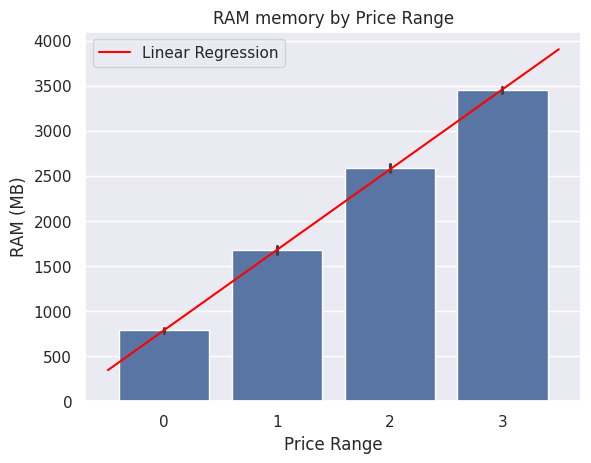

In [21]:
sns.barplot(df, x = "price_range", y = "ram")
plt.title("RAM memory by Price Range")
plt.xlabel("Price Range")
plt.ylabel("RAM (MB)")

slope, intercept, r, p, se = stats.linregress(df["price_range"], df["ram"])
x = np.linspace(-0.5, 3.5, 100)
y = slope * x + intercept

plt.plot(x, y, color = "red", label = "Linear Regression")
plt.legend()
plt.show()

Text(0, 0.5, 'Camera Resolution')

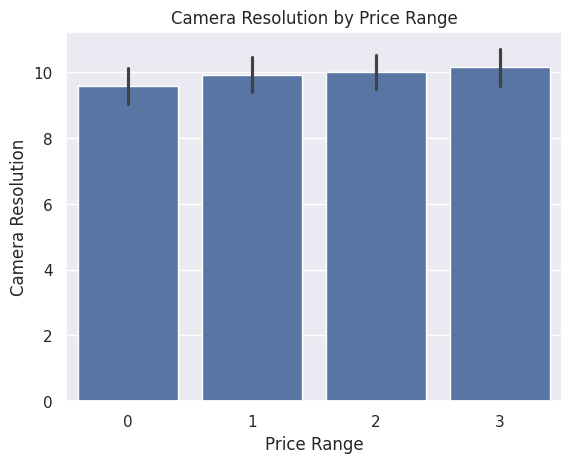

In [22]:
sns.barplot(df, x = "price_range", y = "pc")
plt.title("Camera Resolution by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Camera Resolution")

Here we can clearly see how the price range and the RAM memory follow an almost perfect linear relation, whereas camera resolution and price range do not.

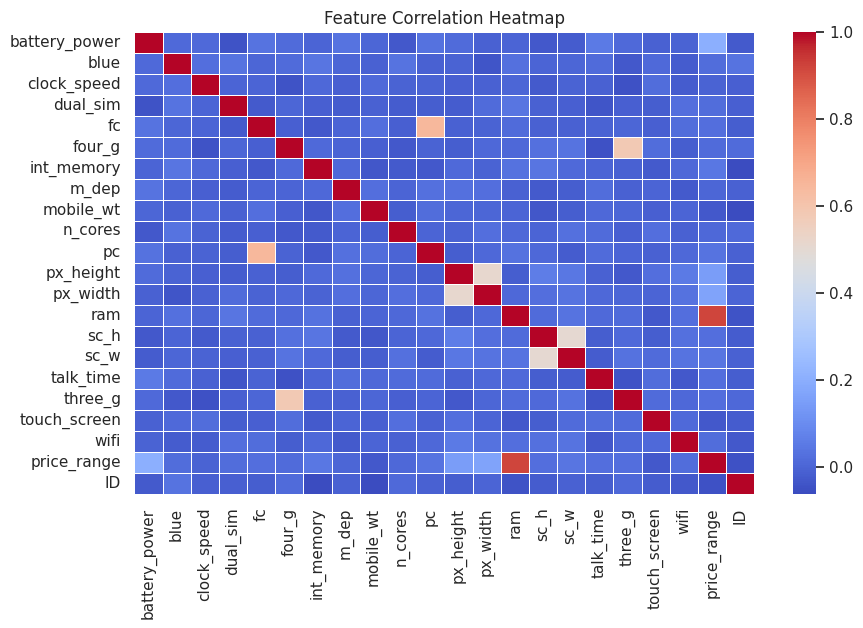

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Here we have a beatiful feature correlation heatmap. We can clearly see now which features are more and less correlated. As expected, price range and RAM show the highest correlation. Price range also shows some level of correlation with battery power and cellphone size.

Let's do some other plots, like a battery power histogram.

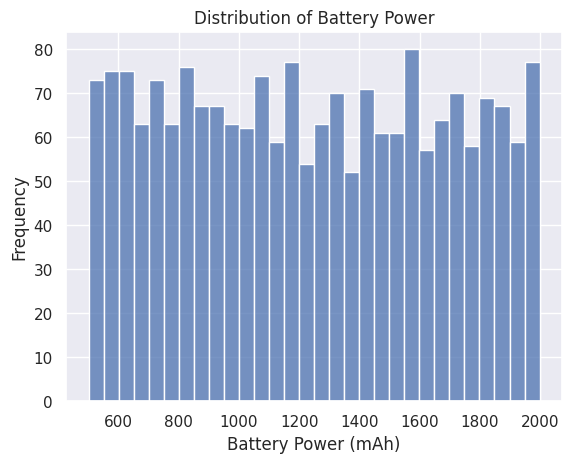

In [24]:
sns.histplot(df["battery_power"], bins=30)
plt.title("Distribution of Battery Power")
plt.xlabel("Battery Power (mAh)")
plt.ylabel("Frequency")
plt.show()

This is not very telling, the distribution of battery power is sort of uniform.

In [25]:
df_grouped = df.groupby('price_range')['battery_power'].apply(list)

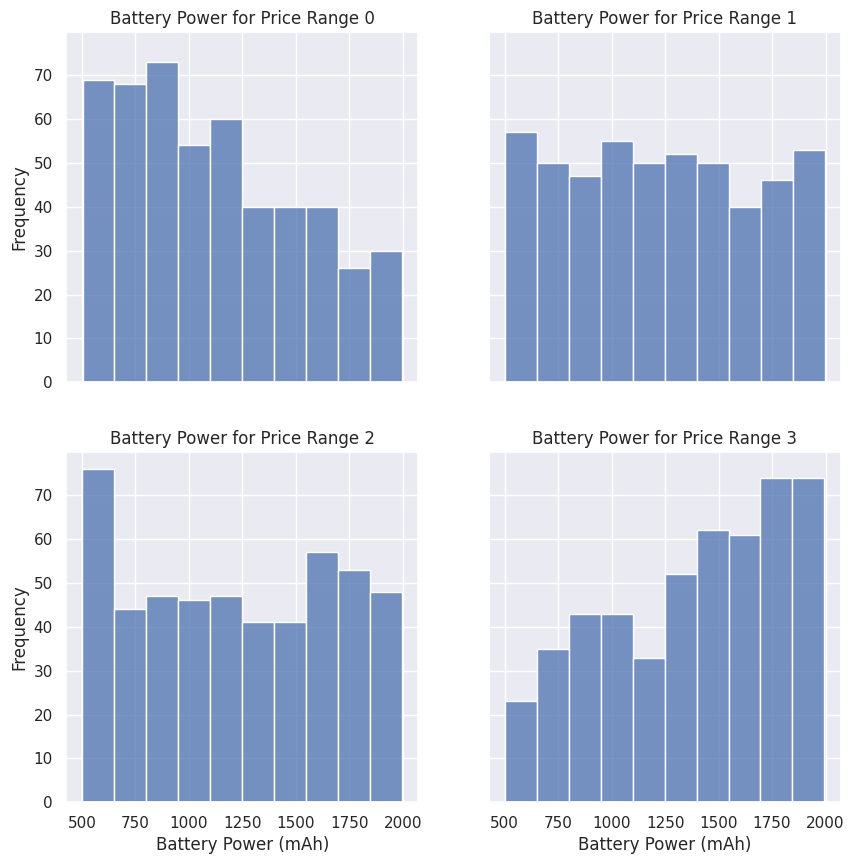

In [26]:
fig, axes = plt.subplots(2,2, sharex= True, sharey= True, figsize=(10,10))
n = 0
for i in range(2):
  for j in range(2):
    sns.histplot(df_grouped[n], ax= axes[i,j])
    axes[i,j].set_title(f"Battery Power for Price Range {n}")
    axes[i,j].set_xlabel("Battery Power (mAh)")
    axes[i,j].set_ylabel("Frequency")
    n+=1
axes[0,0].set_ylabel("Frequency")
axes[1,0].set_ylabel("Frequency")

plt.show()

At least here we see that on group 0 there are more cellphones with worse batteries and on group 3, there are more cellphones with better quality batteries.

# 5. Insight Synthesis and Conclusion:

- Derive conclusions from statistical tests and visualizations.
- Identify key determinants in mobile price classification.
- Highlight any unexpected or significant findings.


RAM is the strongest predictor of price. Higher RAM generally corresponds to higher price ranges. On the other hand, battery power has a weak correlation with price. While useful, it doesn’t strongly determine the price range.
Screen size and resolution matter: phones with larger, higher-resolution screens tend to be in higher price categories.
Connectivity features (4G, 3G, WiFi) impact pricing – More advanced connectivity options are more common in expensive models.
Surprising insight: The number of CPU cores and clock speed do not strongly correlate with price, suggesting other factors play a bigger role.